<a href="https://colab.research.google.com/github/srijac9/Machine-Learning-and-Data-Visualization-Course/blob/main/2023_07_24_SrijaChitturi_Project70.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Instructions

---

#### Goal of the Project

This project is designed for you to practice and solve the activities that are based on the concepts covered in the following lesson:

 1. Multiple linear regression - Introduction
 2. Multicollinearity
 3. Variance Inflation Factor
 4. Car Price Prediction - RFE



---

#### Getting Started:

1. Follow the next 3 steps to create a copy of this colab file and start working on the project.

2. Create a duplicate copy of the Colab file as described below.

  - Click on the **File menu**. A new drop-down list will appear.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/lesson-0/0_file_menu.png' width=500>

  - Click on the **Save a copy in Drive** option. A duplicate copy will get created. It will open up in the new tab on your web browser.

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/lesson-0/1_create_colab_duplicate_copy.png' width=500>

3. After creating the duplicate copy of the notebook, please rename it in the **YYYY-MM-DD_StudentName_Project70** format.

4. Now, write your code in the prescribed code cells.


---

### Problem Statement

Many of your friends may be worried about their chances of getting admission in their dream university for pursuing MS. So, you decided to help them by building a model which is capable of predicting their chance of getting admission in their dream masters program. This model should also help them in understanding which factors are important in MS admissions and what are the scores required for different tests to have better admission chances.

Build a prediction model using multiple linear regression to predict the likelihood of getting admission and evaluate the accuracy of the model.
If there is multicollinearity in the dataset, apply RFE to eliminate redundant features and validate the selected features using VIF.






---

### List of Activities

**Activity 1:** Analyse the Dataset

**Activity 2:** Find Correlation
  
**Activity 3:** Train-Test Split

**Activity 4:** Train the Model

**Activity 5:** Determine Highly Correlated Features

**Activity 6:** Perform RFE







---


#### Activity 1:  Analyse the Dataset

- Create a Pandas DataFrame for **Admission_Predict** dataset using the below link. This dataset consists of several parameters which are considered important during the application for Masters program:


|Field|Description|
|---:|:---|
|Serial No.|Serial No.|
|GRE Score|GRE Scores ( out of 340 )|
|TOEFL Score|TOEFL Scores ( out of 120 )|
|University Rating|University Rating ( out of 5 )|
|SOP|Statement of Purpose Strength ( out of 5 )|
|LOR|Letter of Recommendation Strength ( out of 5 )|
|CGPA|Undergraduate GPA ( out of 10 )|
|Research|Research Experience ( either 0 or 1 )|
|Chance of Admit|Chance of Admit ( ranging from 0 to 1 )|



  **Dataset Link:** https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/Admission_Predict.csv

- Print the first five rows of the dataset. Check for null values and treat them accordingly.

- Also drop the column `Serial No.` from the dataset as it is of no use for analysis. Check whether the column names contain any trailing and leading spaces. If yes, remove the whitespaces from the column names.

**Hint:** You can use `strip()` and `rename()` functions to remove unwanted whitespaces from the column name and to rename them.






In [ ]:
# Import modules
import pandas as pd

# Load the dataset
df = pd.read_csv('https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/Admission_Predict.csv')

# Print first five rows using head() function
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
# Check if there are any null values. If any column has null values, treat them accordingly
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
# Get the list of columns of the dataset.
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
# Drop 'Serial No.' column from the DataFrame
df.drop('Serial No.', axis=1)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [ ]:
# Remove whitespaces from both ends in the column name if there are any
df.rename(columns={'LOR ':'LOR','Chance of Admit ':'Chance of Admit'}, inplace=True)

# Get list of all the columns after renaming.
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

---

#### Activity 2: Find Correlation

We need to predict the value of `Chance of Admit` variable, given other variables. Thus, `Chance of Admit` is the target variable and other columns except `Chance of Admit` are the feature variables.

Find the columns that are highly correlated with the `Chance of Admit` column. For this, calculate the correlation coefficient values between all the columns and then use a heatmap to visualise these correlations.

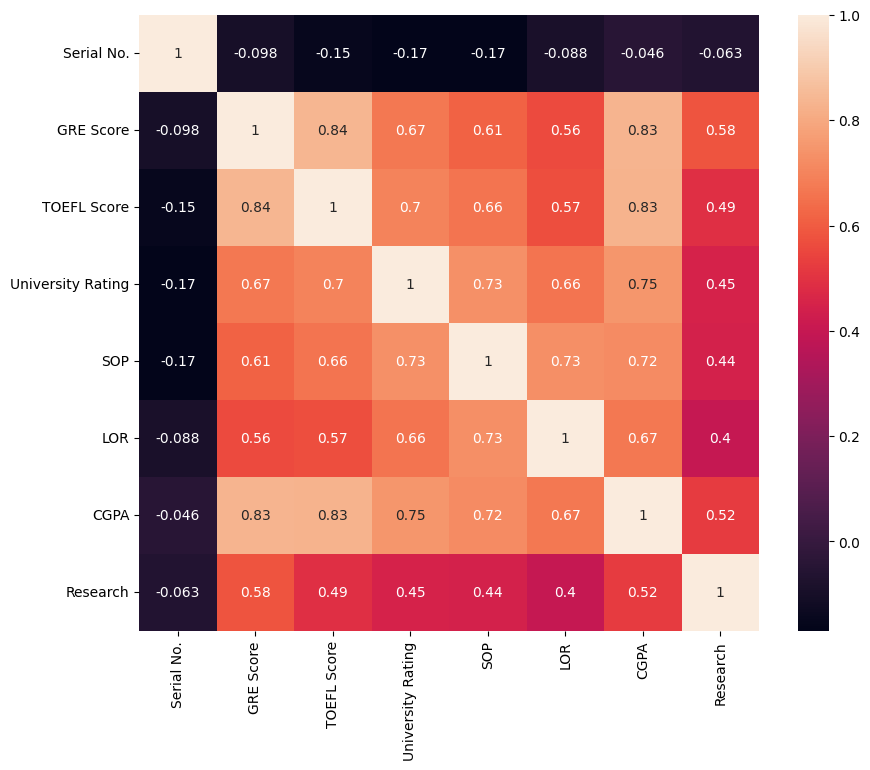

In [ ]:
# Calculate correlation coefficient for all columns of the DataFrame
features = list(df.columns)
features.pop()

df_corr = {}
import numpy as np
for i in features:
  corr_coef = np.corrcoef(df['Chance of Admit'], df[i])[0, 1]
  df_corr[i] = corr_coef

# Use heatmap to observe correlations.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(data=df[df_corr.keys()].corr(), annot=True)
plt.show()

---

#### Activity 3: Train-Test Split


Split the dataset into training set and test set such that the training set contains 70% of the instances and the remaining instances will become the test set.

In [ ]:
# Split the DataFrame into the training and test sets.
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size = 0.3, random_state = 42)

x_train = train_df[features]
y_train = train_df['Chance of Admit']
x_test = test_df[features]
y_test = test_df['Chance of Admit']



---

#### Activity 4: Train the Model

Now build a multiple linear regression model using the `statsmodels.api` module.
Also, print the summary of the linear regression model built.

In [ ]:
#  Build the linear regression model using all the features
import statsmodels.api as sm

x_train_sm = sm.add_constant(x_train)
lin_reg = sm.OLS(y_train, x_train_sm).fit()



In [ ]:
# Print the summary of the linear regression report.
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     158.7
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           1.35e-97
Time:                        22:11:41   Log-Likelihood:                 400.06
No. Observations:                 280   AIC:                            -782.1
Df Residuals:                     271   BIC:                            -749.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.3332      0.14

**Q:** Does the summary report indicate the presence of multicollinearity?

**A:** Yes

----

#### Activity 5: Determine Highly Correlated Features

Find the moderately to highly correlated features with `Chance of Admit` and the corresponding correlation values.

In [ ]:
# Create a Python dictionary storing the moderately to highly correlated features with 'Chance of Admit' and the corresponding correlation values.
major_features = {}
import numpy as np
for i in features:
  corr_coef = np.corrcoef(df['Chance of Admit'], df[i])[0, 1]
  if (corr_coef >= 0.5) or (corr_coef <= -0.5):
    major_features[i] = corr_coef

major_features

{'GRE Score': 0.8026104595903499,
 'TOEFL Score': 0.7915939869351049,
 'University Rating': 0.7112502503917218,
 'SOP': 0.6757318583886716,
 'LOR': 0.6698887920106936,
 'CGPA': 0.8732890993553001,
 'Research': 0.5532021370190395}

**Q:** How many features are moderately to highly correlated with `Chance of Admit`?

**A:** 7





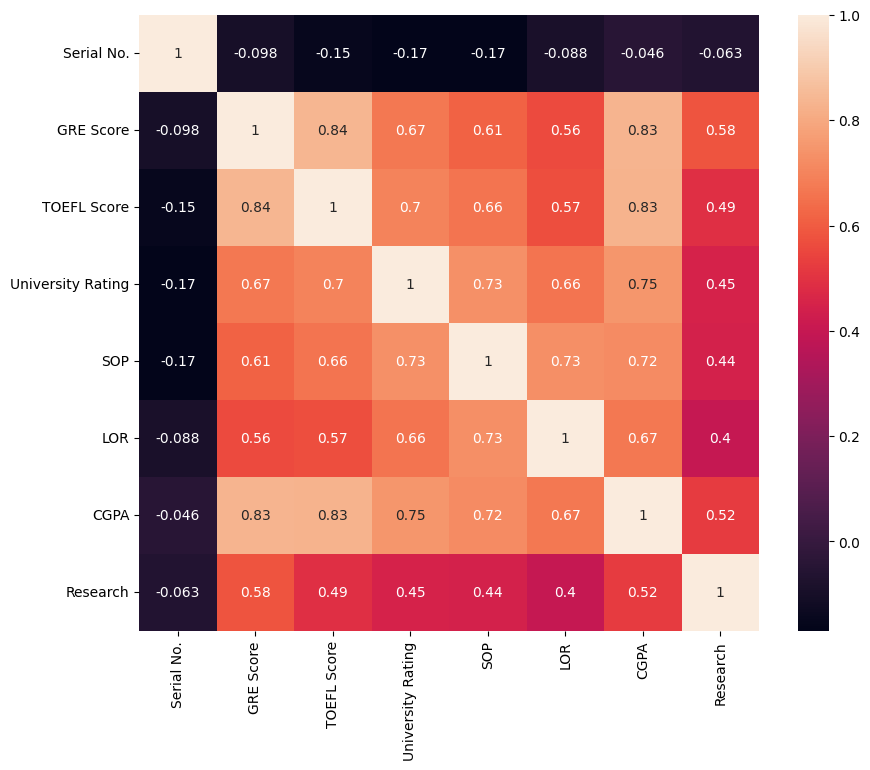

In [ ]:
# Create a heatmap to visualise the correlation between the above correlated features (if there exists).

plt.figure(figsize=(10,8))
sns.heatmap(data=df[x_train.keys()].corr(), annot=True)
plt.show()

#### Activity 6: Perform RFE (Recursive Feature Elimination)

1. Choose the number of features that you want to use for RFE (choose 3 to 5 features).
2. Apply RFE using `sklearn.feature_selection` module.
2. Build linear regression model using the best features selected by RFE.
3. Validate the significance of the selected features by calculating their VIF values.

In [ ]:
# Use RFE to eliminate few features from the dataset.

# Import RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# RFE with 3-5 features.
skl_lin_reg = LinearRegression()
rfe = RFE(skl_lin_reg, n_features_to_select=10)

# Fit with selected features.
rfe.fit(x_train[major_features.keys()], y_train)

# Print the 'support_' and 'ranking_' attributes to find out the features selected by RFE
print(rfe.support_, "\n")
print(rfe.ranking_)

[ True  True  True  True  True  True  True] 

[1 1 1 1 1 1 1]


In [ ]:
# Print the features selected by RFE in the previous step.
rfe_features = x_train[major_features.keys()].columns[rfe.support_]
rfe_features

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research'],
      dtype='object')

In [ ]:
# Build a linear regression model using the 'statsmodels.api' module having the above features selected by RFE.
# Import the 'statsmodels.api' module.
import statsmodels.api as sm

# Subset the train set such that it contains only the above  selected features.
x_train_rfe = x_train[rfe_features]

# Add the 'const' column to the features set.
x_train_rfe = sm.add_constant(x_train_rfe)

# Fit the model
sm_lin_reg = sm.OLS(y_train, x_train_rfe).fit()


# Print the summary of the linear regression report
print(sm_lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     157.4
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           8.72e-92
Time:                        22:11:42   Log-Likelihood:                 383.51
No. Observations:                 280   AIC:                            -751.0
Df Residuals:                     272   BIC:                            -721.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2842      0.15

In [ ]:
# Check for the VIF values of the features selected by RFE above.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,1642.84
6,CGPA,5.13
1,GRE Score,4.61
2,TOEFL Score,4.04
4,SOP,3.13
3,University Rating,3.01
5,LOR,2.57
7,Research,1.53


**Q:** How many features have VIF values above 10?

**A:** None

**Q:** What is the $R^2$ value after RFE?

**A:** 0.802


----

### Submitting the Project:

1. After finishing the project, click on the **Share** button on the top right corner of the notebook. A new dialog box will appear.

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/2_share_button.png' width=500>

2. In the dialog box, make sure that '**Anyone on the Internet with this link can view**' option is selected and then click on the **Copy link** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/3_copy_link.png' width=500>

3. The link of the duplicate copy (named as **YYYY-MM-DD_StudentName_Project70**) of the notebook will get copied

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/4_copy_link_confirmation.png' width=500>

4. Go to your dashboard and click on the **My Projects** option.
   
   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/5_student_dashboard.png' width=800>

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/6_my_projects.png' width=800>

5. Click on the **View Project** button for the project you want to submit.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/7_view_project.png' width=800>

6. Click on the **Submit Project Here** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/8_submit_project.png' width=800>

7. Paste the link to the project file named as **YYYY-MM-DD_StudentName_Project70** in the URL box and then click on the **Submit** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/9_enter_project_url.png' width=800>

---